In [1]:
###################################################
### this file loads a model and unfreeze all of its layers and train it with dataset

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np
import albumentations as A
import random
import pickle
import matplotlib.pyplot as plt
#####################################33
# parameters
model_path = 'C:/Users/s.h.m/Downloads/codes/check_mobilenetv2_sgd_4_m0_e300/model_epoch_300.keras'
train_dir = 'C:/Users/s.h.m/Downloads/dataset/train'
val_dir = 'C:/Users/s.h.m/Downloads/dataset/val'
checkpoint_dir = 'C:/Users/s.h.m/Downloads/codes/check_mobilenetv2_sgd_4_m0_e300_fined_50'


img_height, img_width = 160, 160
batch_size = 64
epochs = 100
initial_learning_rate = 1e-5
###################################3
# functions

def albumentations_preprocessing(image):
    aug_list = [
        A.GaussianBlur(p=0.0),  # original image
        A.GaussianBlur(p=0.0),  # original image
        A.GaussianBlur(p=1.0),
        A.CoarseDropout(max_holes=2, max_height=16, max_width=16, p=1.0),
        A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),
        A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=1.0),
        A.ChannelShuffle(p=1.0)
    ]

    augmentation = random.choice(aug_list)
    transform = A.Compose([augmentation])
    augmented = transform(image=np.array(image))
    return augmented['image']

def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()
############################################3333
# main code

train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=albumentations_preprocessing
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Define the base model
model = tf.keras.models.load_model(model_path)

for layer in model.layers:
    layer.trainable = True



model.compile(optimizer=SGD(learning_rate=initial_learning_rate, momentum=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'categorical_accuracy', 'Precision', 'Recall'])

os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'model_epoch_{epoch:02d}.keras'),
    save_weights_only=False,
    save_freq='epoch')

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[checkpoint_callback])

with open(f'{checkpoint_dir}/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

with open(f'{checkpoint_dir}/training_history.pkl', 'rb') as f:
    saved_history = pickle.load(f)

plot_history(saved_history)


INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.14 (you have 1.4.13). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


Found 5690 images belonging to 24 classes.
Found 1208 images belonging to 24 classes.
Epoch 1/100


i:\anaconda\envs\tf-gpu\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - Precision: 0.5507 - Recall: 0.0028 - accuracy: 0.1540 - categorical_accuracy: 0.1540 - loss: 2.8925 - val_Precision: 0.9593 - val_Recall: 0.0977 - val_accuracy: 0.4868 - val_categorical_accuracy: 0.4868 - val_loss: 1.8582
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - Precision: 0.9008 - Recall: 0.0063 - accuracy: 0.1477 - categorical_accuracy: 0.1477 - loss: 2.9051 - val_Precision: 0.9683 - val_Recall: 0.1010 - val_accuracy: 0.4760 - val_categorical_accuracy: 0.4760 - val_loss: 1.8844
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - Precision: 0.8973 - Recall: 0.0090 - accuracy: 0.1573 - categorical_accuracy: 0.1573 - loss: 2.8590 - val_Precision: 0.9764 - val_Recall: 0.1026 - val_accuracy: 0.4636 - val_categorical_accuracy: 0.4636 - val_loss: 1.9179
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 239s 3s/step - Precision: 0.9501 - Recall: 0.0061 - accuracy: 0.1611 - categorical_accuracy: 0.1611 - loss: 2.8835 - val_Precision: 0.9576 - val_

47/89 ━━━━━━━━━━━━━━━━━━━━ 1:50 3s/step - Precision: 0.9666 - Recall: 0.0094 - accuracy: 0.2051 - categorical_accuracy: 0.2051 - loss: 2.7101

Found 5690 images belonging to 24 classes.
Found 1208 images belonging to 24 classes.
Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - Precision: 0.8749 - Recall: 0.0129 - accuracy: 0.2501 - categorical_accuracy: 0.2501 - loss: 2.6257 - val_Precision: 0.7727 - val_Recall: 0.0141 - val_accuracy: 0.3369 - val_categorical_accuracy: 0.3369 - val_loss: 2.3675
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - Precision: 0.8580 - Recall: 0.0125 - accuracy: 0.2567 - categorical_accuracy: 0.2567 - loss: 2.6004 - val_Precision: 0.7826 - val_Recall: 0.0149 - val_accuracy: 0.3377 - val_categorical_accuracy: 0.3377 - val_loss: 2.3639
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - Precision: 0.7611 - Recall: 0.0097 - accuracy: 0.2429 - categorical_accuracy: 0.2429 - loss: 2.6268 - val_Precision: 0.7826 - val_Recall: 0.0149 - val_accuracy: 0.3377 - val_categorical_accuracy: 0.3377 - val_loss: 2.3607
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - Precision: 0.9032 - Recall: 0.0110 -

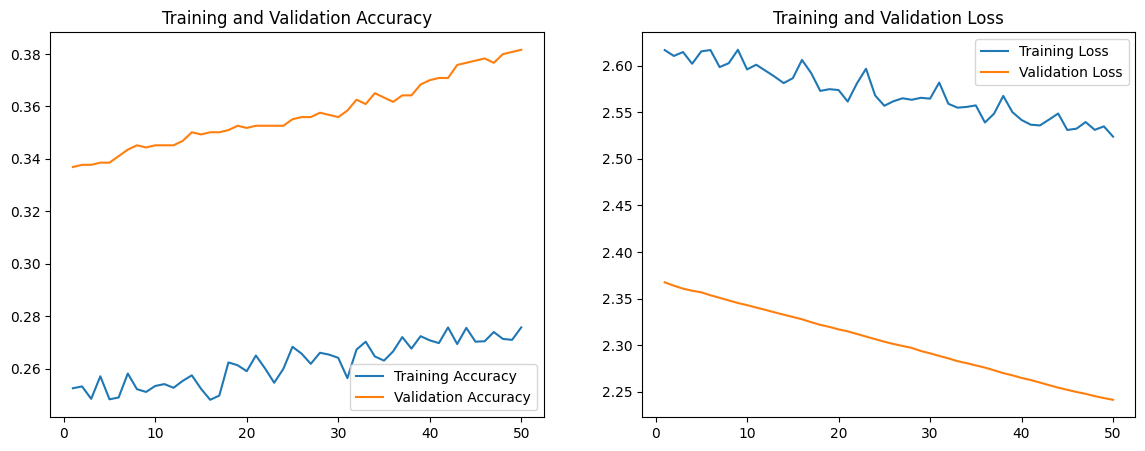

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np
import albumentations as A
import random
import pickle
import matplotlib.pyplot as plt

# parameters
model_path = 'C:/Users/s.h.m/Downloads/codes/sgd_fined_v2/model_epoch_50.keras'
train_dir = 'C:/Users/s.h.m/Downloads/dataset/train'
val_dir = 'C:/Users/s.h.m/Downloads/dataset/val'
checkpoint_dir = 'C:/Users/s.h.m/Downloads/codes/sgd_fined_v3'


img_height, img_width = 160, 160
batch_size = 64
epochs = 50
initial_learning_rate = 1e-5

# functions

def albumentations_preprocessing(image):
    aug_list = [
        A.GaussianBlur(p=0.0),  # original image
        A.GaussianBlur(p=0.0),  # original image
        A.GaussianBlur(p=1.0),
        A.CoarseDropout(max_holes=2, max_height=16, max_width=16, p=1.0),
        A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),
        A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=1.0),
        A.ChannelShuffle(p=1.0)
    ]

    augmentation = random.choice(aug_list)
    transform = A.Compose([augmentation])
    augmented = transform(image=np.array(image))
    return augmented['image']

def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# main code

train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=albumentations_preprocessing
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Define the base model
model = tf.keras.models.load_model(model_path)

# Freeze the base model
for layer in model.layers:
    layer.trainable = True



model.compile(optimizer=SGD(learning_rate=initial_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'categorical_accuracy', 'Precision', 'Recall'])

os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'model_epoch_{epoch:02d}.keras'),
    save_weights_only=False,
    save_freq='epoch')

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[checkpoint_callback])

with open(f'{checkpoint_dir}/training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

with open(f'{checkpoint_dir}/training_history.pkl', 'rb') as f:
    saved_history = pickle.load(f)

plot_history(saved_history)
